This code is to predict steam purchases(sales) based on the feature columns using a random forest model

In [2]:
import pandas as pd 
import numpy as np


In [4]:
df=pd.read_csv('GTAV_Steam_Reviews.csv')
df.head()

,id,language,review,created,voted_up,votes_up,comment_count,steam_purchase,recieved_for_free,written_during_early_access,author_num_games_owned,author_num_reviews,author_playtime_forever,author_playtime_last_two_weeks,author_playtime_at_review,author_last_played
0,157337410,english,"Games good, But Rockstar Your a BILLION DOLLAR...",2024-02-01 16:00:22,True,0,0,True,False,False,0,9,9105,131,9105,2024-01-30 21:04:02
1,157337371,english,modders make it better and free everything,2024-02-01 15:59:57,True,0,0,True,True,False,0,1,2530,1728,2530,2024-02-01 16:01:41
2,157337210,english,great game,2024-02-01 15:57:48,True,0,0,False,False,False,0,1,281457,4523,281457,2024-02-01 00:48:38
3,157336468,english,best,2024-02-01 15:47:51,True,0,0,True,False,False,34,3,2842,431,2816,2024-02-01 15:50:12
4,157335380,english,sed,2024-02-01 15:32:26,True,0,0,True,False,False,11,2,2055,79,2021,2024-02-01 16:12:38


In [6]:
df.describe(include='all')

,id,language,review,created,voted_up,votes_up,comment_count,steam_purchase,recieved_for_free,written_during_early_access,author_num_games_owned,author_num_reviews,author_playtime_forever,author_playtime_last_two_weeks,author_playtime_at_review,author_last_played
count,5.209900e+04,52099,51801,52099,52099,52099.000000,52099.000000,52099,52099,52099,52099.000000,52099.000000,5.209900e+04,52099.000000,5.209900e+04,52099
unique,NaN,1,35291,52024,2,NaN,NaN,2,2,1,NaN,NaN,NaN,NaN,NaN,51541
top,NaN,english,good,2023-12-24 06:37:13,True,NaN,NaN,True,False,False,NaN,NaN,NaN,NaN,NaN,2024-02-01 16:05:56
freq,NaN,52099,1337,2,47261,NaN,NaN,48643,48352,52099,NaN,NaN,NaN,NaN,NaN,5
mean,1.489459e+08,NaN,NaN,NaN,NaN,0.584387,0.018522,NaN,NaN,NaN,20.017467,5.844738,1.118878e+04,342.430488,8.216967e+03,NaN
std,5.183634e+06,NaN,NaN,NaN,NaN,22.359856,0.352163,NaN,NaN,NaN,127.495124,12.600061,2.473005e+04,1027.536478,2.282778e+04,NaN
min,1.407663e+08,NaN,NaN,NaN,NaN,0.000000,0.000000,NaN,NaN,NaN,0.000000,1.000000,5.000000e+00,0.000000,5.000000e+00,NaN
25%,1.440101e+08,NaN,NaN,NaN,NaN,0.000000,0.000000,NaN,NaN,NaN,0.000000,1.000000,2.164000e+03,0.000000,7.545000e+02,NaN
50%,1.486648e+08,NaN,NaN,NaN,NaN,0.000000,0.000000,NaN,NaN,NaN,0.000000,2.000000,5.051000e+03,0.000000,2.423000e+03,NaN
75%,1.539681e+08,NaN,NaN,NaN,NaN,0.000000,0.000000,NaN,NaN,NaN,6.000000,6.000000,1.169250e+04,151.000000,7.405500e+03,NaN


In [7]:
#check for missing values
df.isnull().sum()

id                                  0
language                            0
review                            298
created                             0
voted_up                            0
votes_up                            0
comment_count                       0
steam_purchase                      0
recieved_for_free                   0
written_during_early_access         0
author_num_games_owned              0
author_num_reviews                  0
author_playtime_forever             0
author_playtime_last_two_weeks      0
author_playtime_at_review           0
author_last_played                  0
dtype: int64

In [8]:
#check for duplicates
df.duplicated().sum()

np.int64(0)

In [9]:
#remove missing values
df.dropna(inplace=True)

In [11]:
#handle outliers for numerical columns
numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns
for col in numerical_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    df = df[(df[col] >= lower_bound) & (df[col] <= upper_bound)]
    


In [12]:
#encode categorical features
categorical_cols = df.select_dtypes(include=['object']).columns
df = pd.get_dummies(df, columns=categorical_cols, drop_first=True)
df.head()



,id,voted_up,votes_up,comment_count,steam_purchase,recieved_for_free,written_during_early_access,author_num_games_owned,author_num_reviews,author_playtime_forever,...,author_last_played_2024-02-01 16:09:32,author_last_played_2024-02-01 16:21:42,author_last_played_2024-02-01 16:24:06,author_last_played_2024-02-01 16:25:57,author_last_played_2024-02-01 16:27:37,author_last_played_2024-02-01 16:27:47,author_last_played_2024-02-01 16:29:13,author_last_played_2024-02-01 16:34:02,author_last_played_2024-02-01 16:35:18,author_last_played_2024-02-01 16:40:39
8,157334272,True,0,0,True,False,False,0,3,6306,...,False,False,False,False,False,False,False,False,False,False
20,157328667,True,0,0,True,False,False,0,1,4419,...,False,False,False,False,False,False,False,False,False,False
29,157325751,False,0,0,True,True,False,0,1,706,...,False,False,False,False,False,False,False,False,False,False
32,157324588,True,0,0,True,False,False,0,1,1555,...,False,False,False,False,False,False,False,False,False,False
33,157323933,True,0,0,True,False,False,0,1,83,...,False,False,False,False,False,False,False,False,False,False


In [16]:
#encode target variable
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['steam_purchase'] = le.fit_transform(df['steam_purchase'])
df.head()

,id,voted_up,votes_up,comment_count,steam_purchase,recieved_for_free,written_during_early_access,author_num_games_owned,author_num_reviews,author_playtime_forever,...,author_last_played_2024-02-01 16:09:32,author_last_played_2024-02-01 16:21:42,author_last_played_2024-02-01 16:24:06,author_last_played_2024-02-01 16:25:57,author_last_played_2024-02-01 16:27:37,author_last_played_2024-02-01 16:27:47,author_last_played_2024-02-01 16:29:13,author_last_played_2024-02-01 16:34:02,author_last_played_2024-02-01 16:35:18,author_last_played_2024-02-01 16:40:39
8,157334272,True,0,0,1,False,False,0,3,6306,...,False,False,False,False,False,False,False,False,False,False
20,157328667,True,0,0,1,False,False,0,1,4419,...,False,False,False,False,False,False,False,False,False,False
29,157325751,False,0,0,1,True,False,0,1,706,...,False,False,False,False,False,False,False,False,False,False
32,157324588,True,0,0,1,False,False,0,1,1555,...,False,False,False,False,False,False,False,False,False,False
33,157323933,True,0,0,1,False,False,0,1,83,...,False,False,False,False,False,False,False,False,False,False


In [17]:
#split the data into features and target variable
X = df.drop('steam_purchase', axis=1)
y = df['steam_purchase']


In [18]:
#split the data into training and testing sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#scale the features
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


In [19]:
#train a random forest classifier
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train, y_train)


,n_estimators,100
,criterion,'gini'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [20]:
#make predictions
y_pred = rf.predict(X_test)


In [21]:
#evaluate the model
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))


Accuracy: 0.9530416221985059
Classification Report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00       132
           1       0.95      1.00      0.98      2679

    accuracy                           0.95      2811
   macro avg       0.48      0.50      0.49      2811
weighted avg       0.91      0.95      0.93      2811

Confusion Matrix:
 [[   0  132]
 [   0 2679]]


c:\Users\HomePC\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1706: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
c:\Users\HomePC\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1706: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
c:\Users\HomePC\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1706: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(

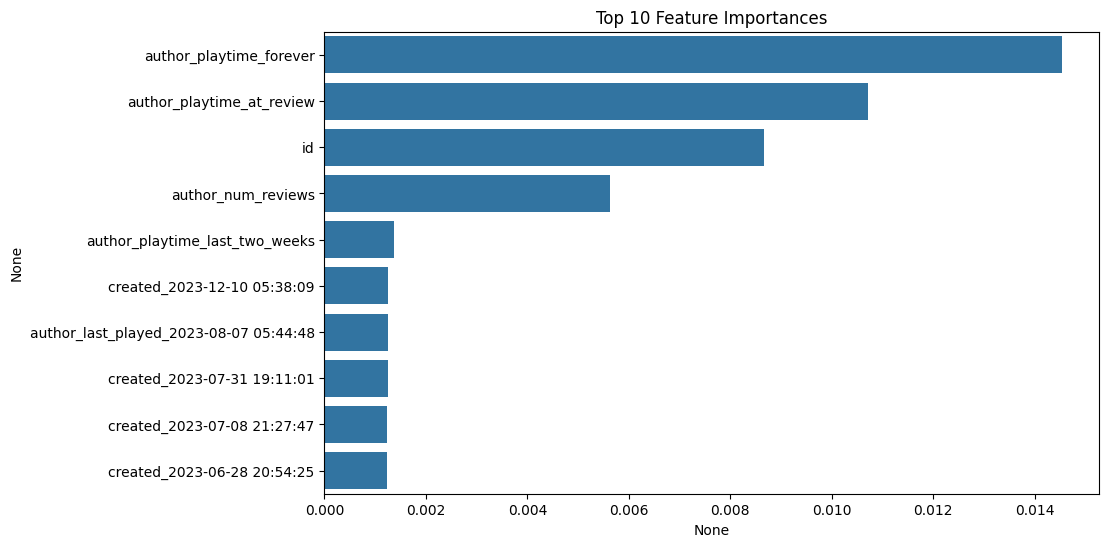

In [24]:
#plot feature importance
import matplotlib.pyplot as plt
import seaborn as sns
feature_importances = pd.Series(rf.feature_importances_, index=X.columns)
plt.figure(figsize=(10,6))
feature_importances.nlargest(10).plot(kind='barh')
sns.barplot(x=feature_importances.nlargest(10), y=feature_importances.nlargest(10).index)



plt.title('Top 10 Feature Importances')
plt.show()

